# **Emotions - Emoji - comparison of different models**

# Load necessary libraries

In [ ]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

import pickle

import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

link_model_folder = '/content/drive/MyDrive/Emotions_dataset/Models/'
link_dataset = '/content/drive/MyDrive/Emotions_dataset/dataset_balanced.pickle'

Mounted at /content/drive


In [ ]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Different models testing

Formula to calculate parameters:

shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters)

Example: ((3*3*32)+1)*64 = 18496

# Build the models

Variation 0: Initial model 

In [ ]:
emotion_model_0 = Sequential()

emotion_model_0.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_0.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model_0.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_0.add(Dropout(0.25))

emotion_model_0.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_0.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model_0.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_0.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_0.add(Dropout(0.25))
emotion_model_0.add(Flatten())

emotion_model_0.add(Dense(1024, activation='relu'))
emotion_model_0.add(Dropout(0.5))

# output layer
emotion_model_0.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_0.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Variation 1: combine max pooling + convolutional layer in one layer by using strides

In [ ]:
emotion_model_1 = Sequential() #combiner max pooling + convolutional layer --> better perf ?
_
emotion_model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_1.add(Conv2D(64, kernel_size=(3, 3), strides = (2,2), activation='relu'))
emotion_model_1.add(Dropout(0.25))

emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), strides = (2,2), activation='relu'))

emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), strides = (2,2), activation='relu'))
emotion_model_1.add(Dropout(0.25))
emotion_model_1.add(Flatten())

emotion_model_1.add(Dense(1024, activation='relu'))
emotion_model_1.add(Dropout(0.5))

# output layer
emotion_model_1.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Variation 2: Add same padding to avoid losing dimensions after the convolutional layer

In [ ]:
emotion_model_2 = Sequential() #avec padding same ( --> plus de parametres)

emotion_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_2.add(Conv2D(64, kernel_size=(3, 3), padding ='same', activation='relu'))
emotion_model_2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_2.add(Dropout(0.25))

emotion_model_2.add(Conv2D(128, kernel_size=(3, 3), padding ='same', activation='relu'))
emotion_model_2.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model_2.add(Conv2D(128, kernel_size=(3, 3), padding ='same', activation='relu'))
emotion_model_2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_2.add(Dropout(0.25))
emotion_model_2.add(Flatten())

emotion_model_2.add(Dense(1024, activation='relu'))
emotion_model_2.add(Dropout(0.5))

# output layer
emotion_model_2.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Variation 3: without dropout (or with lower dropout)

In [ ]:
emotion_model_3 = Sequential() # without dropout
_
emotion_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model_3.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_3.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_3.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_3.add(Flatten())

emotion_model_3.add(Dense(1024, activation='relu'))

# output layer
emotion_model_3.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Variation 4: add batch normalization after each layer

In [ ]:
emotion_model_4 = Sequential() 

emotion_model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_4.add(BatchNormalization())

emotion_model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model_4.add(BatchNormalization())
emotion_model_4.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_4.add(Dropout(0.25))

emotion_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_4.add(BatchNormalization())

emotion_model_4.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_4.add(BatchNormalization())
emotion_model_4.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_4.add(Dropout(0.25))

emotion_model_4.add(Flatten())
emotion_model_4.add(Dense(1024, activation='relu'))
emotion_model_4.add(BatchNormalization())
emotion_model_4.add(Dropout(0.5))

# output layer
emotion_model_4.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Variation 5: add decreasing dense layers after 1024

In [ ]:
emotion_model_5 = Sequential() #avec dense layers decroissants apres 1024

emotion_model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model_5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model_5.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_5.add(Dropout(0.25))

emotion_model_5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_5.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model_5.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_5.add(Dropout(0.25))
emotion_model_5.add(Flatten())

emotion_model_5.add(Dense(1024, activation='relu'))
emotion_model_5.add(Dense(512, activation='relu'))
emotion_model_5.add(Dense(256, activation='relu'))
emotion_model_5.add(Dense(128, activation='relu'))
emotion_model_5.add(BatchNormalization())
emotion_model_5.add(Dropout(0.5))

emotion_model_5.add(Dense(7, activation='softmax'))

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001)
emotion_model_5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models = [emotion_model_0, emotion_model_1, emotion_model_2,emotion_model_3, emotion_model_4,emotion_model_5]


# Fit the model

In [ ]:
link_dataset = '/content/drive/MyDrive/Emotions_dataset/dataset_balanced.pickle'

# define parameters
epochs = 50
batch_size = 64

# load the data-dict containing the dataset
with open(link_dataset, 'rb') as handle: 
    data_dict = pickle.load(handle)

# Extract the data from the data_dict
X_train = data_dict['X_train']
X_test = data_dict['X_test']
y_train = data_dict['y_train']
y_test = data_dict['y_test']


for i in range(6):
  # Create a folder for each model 
  folder_path = '/content/drive/MyDrive/Emotions_dataset/Models/emotion_model_'+ str(i)
  # Create the folder
  os.makedirs(folder_path, exist_ok = True)
  model = models[i]
  history = model.fit(
          X_train, 
          y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(X_test, y_test))
  # Save the model 
  model.save(folder_path +'/model.h5')
  # Save the history in a pickle
  with open(folder_path +'/history.pickle', 'wb') as handle:  
    history.history['epoch']= history.epoch
    pickle.dump(history.history, handle) # serializes the dictionary and writes it to the file.
  i += 1


Epoch 1/20
766/766 [==============================] - 26s 17ms/step - loss: 1.8537 - accuracy: 0.2377 - val_loss: 1.7110 - val_accuracy: 0.3449
Epoch 2/20
766/766 [==============================] - 13s 16ms/step - loss: 1.6838 - accuracy: 0.3506 - val_loss: 1.6049 - val_accuracy: 0.3866
Epoch 3/20
766/766 [==============================] - 13s 17ms/step - loss: 1.5676 - accuracy: 0.4046 - val_loss: 1.4770 - val_accuracy: 0.4450
Epoch 4/20
766/766 [==============================] - 13s 17ms/step - loss: 1.4742 - accuracy: 0.4463 - val_loss: 1.3712 - val_accuracy: 0.4822
Epoch 5/20
766/766 [==============================] - 13s 17ms/step - loss: 1.3974 - accuracy: 0.4745 - val_loss: 1.3521 - val_accuracy: 0.4950
Epoch 6/20
766/766 [==============================] - 13s 17ms/step - loss: 1.3376 - accuracy: 0.4983 - val_loss: 1.3218 - val_accuracy: 0.5099
Epoch 7/20
766/766 [==============================] - 13s 17ms/step - loss: 1.2827 - accuracy: 0.5224 - val_loss: 1.2686 - val_accuracy:

# Evaluate the model

In [ ]:
# Choose the model to evaluate
i = 0
model = models[i]
model.summary()

# Open the folder for the model 
model_path = '/content/drive/MyDrive/Emotions_dataset/Models/emotion_model_'+ str(i) +'/model.h5'
history_path = '/content/drive/MyDrive/Emotions_dataset/Models/emotion_model_'+ str(i) +'/history.pickle'
# Load the trained model
model = load_model(model_path)
# Load the training history
with open(history_path, 'rb') as handle:
    history = pickle.load(handle)

# Extract Epochs
epoch = history['epoch']

# Extract loss values
train_loss = history['loss']
val_loss = history['val_loss']

# Extract accuracy values
train_acc = history['accuracy']
val_acc = history['val_accuracy']

NameError: ignored

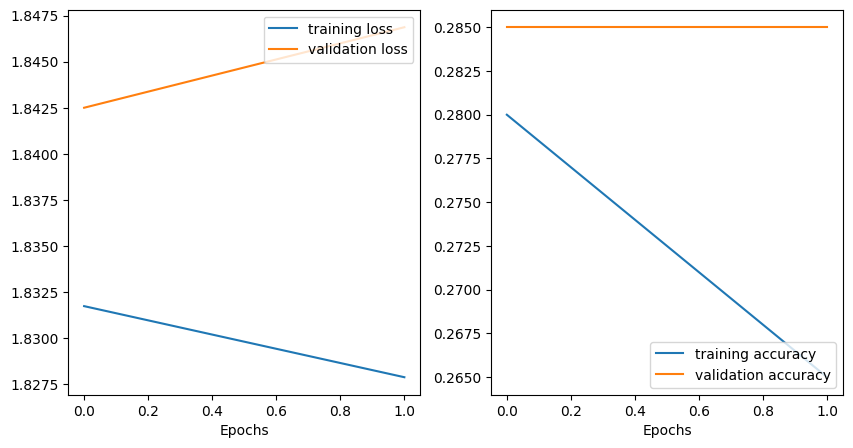

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(epoch, train_loss)
axs[0].plot(epoch, val_loss)
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[0].set_xlabel('Epochs');
axs[1].plot(epoch, train_acc)
axs[1].plot(epoch, val_acc)
axs[1].set_xlabel('Epochs');

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 2s 184ms/step - loss: 1.8469 - accuracy: 0.2850
Test Loss: 1.846869945526123
Test Accuracy: 0.2849999964237213


# Confusion Matrix


7/7 [==============================] - 1s 102ms/step


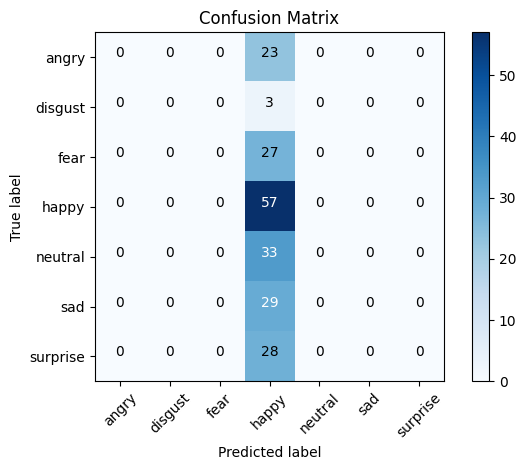

In [ ]:
# Obtain predictions from the trained model
y_pred = model.predict(X_test)

# Convert labels to classes
labels = ['angry','disgust','fear','happy','neutral','sad', 'surprise']

# Convert one-hot encoded vectors to class labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=np.arange(len(labels)))

# Plot confusion matrix
plot_confusion_matrix(cm, labels)
plt.show()